In [67]:
#importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
import matplotlib.ticker as ticker

pd.options.mode.copy_on_write = True

# Question 1

In [7]:
#tuple of the age values
age = (13,15,16,16,19,20,20,21,22,22,23,25,25,25,30,33,33,33,33,35,35,36,40,45,46,52,70)

In [8]:
#part a

length = len(age)

#finding the mean
mean = sum(age)/length 

#finding the median
if (length%2) == 0:             
    median = (age[length/2-1]+age[length/2])/2
else:
    median = age[length//2]

print(f"The mean is {mean}")
print(f"The median is {median}")

The mean is 29.74074074074074
The median is 25


In [9]:
#part b

max_count = 1
count = 1
for i in range(length-2):       #finding the mode and recording its count
    if age[i] == age[i+1]:
        count += 1
        if count > max_count:
            mode = age[i]
            max_count = count
    else:
        count = 1
print(f"The mode is {mode} with a count of {max_count}")
print("The data's modality is unimodal.")           #commenting on the modality of the data

The mode is 33 with a count of 4
The data's modality is unimodal.


In [10]:
#part c

if length%2 == 0:           #finding the quartiles if the length is even
    if (length/2)%2 == 0:
        Q1 = (age[length/4-1]+age[length/4])/2
        Q3 = (age[length/2+(length/4-1)]+age[length/2+length/4])/2
    else:
        Q1 = age[length//4]
        Q3 = age[length/2+length//4]
else:                       #finding the quartiles if the length is odd (we ignore the median)
    if (length//2)%2 == 0:
        Q1 = (age[length//4-1]+age[length//4])/2
        Q3 = (age[length//2+(length//4-1)]+age[length/2+length//4])/2
    else:
        Q1 = age[length//4]
        Q3 = age[length//2+length//4]
        
print(f"The first quartile is {Q1}")
print(f"The third quartile is {Q3}")


The first quartile is 20
The third quartile is 35


In [11]:
#part d

#printing the 5 number summary using pre-calculated values
print(f"The five number summary: min = {age[0]}, Q1 = {Q1}, median = {median}, Q3 = {Q3}, max = {age[length-1]}")

The five number summary: min = 13, Q1 = 20, median = 25, Q3 = 35, max = 70


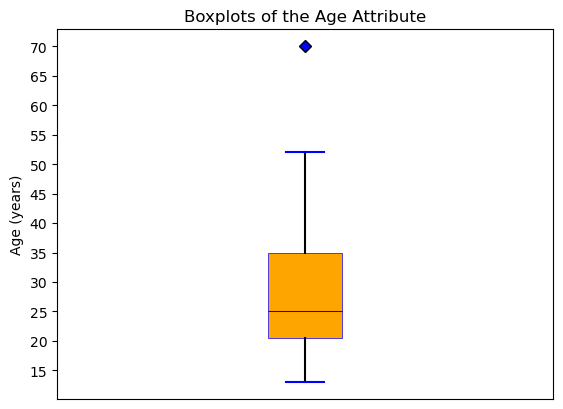

In [12]:
#part e

#creating a figure and axes
fig, ax = plt.subplots()

#making the boxplot with the age data and playing with colors, lines, and shapes
ax.boxplot(age,                 
           patch_artist=True,
           showmeans=False,
           medianprops={"color": "blue", "linewidth": 0.75},
           boxprops={"facecolor": "orange", "edgecolor": "blue", "linewidth": 0.5},
           whiskerprops={"color": "black", "linewidth": 1.5}, 
           capprops={"color": "blue", "linewidth": 1.5},
           flierprops={"marker": "D", "markerfacecolor": "blue"})

#setting up axes and titles
ax.set(ylabel = "Age (years)")         
ax.set_title("Boxplots of the Age Attribute")
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_visible(False)

plt.show()

# Question 2

In [13]:
#loading the Hitters data set and showing the data
from ISLP import load_data
Hitters = load_data('Hitters')
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [14]:
#part a

#loading Hitters into a DataFrame object
df = pd.DataFrame(Hitters)

#getting the number of rows and columns from the dataframe
num_rows, num_columns = df.shape
print(f"There are {num_rows} rows and {num_columns} columns in this data set.")

There are 322 rows and 20 columns in this data set.


## part b

This data set is from the 1986 and 1987. HmRun is the number of home runs a player hit in 1986, and CHmRun is the number of home runs during the player's career.

In [28]:
#part c

for stats in Hitters.columns:
    try:        #if the data is numerical it runs
        median_col = np.median(Hitters[stats])          #calculating the medians
        print(f"The median of {stats} is {median_col}")
    except:
        break

The median of AtBat is 379.5
The median of Hits is 96.0
The median of HmRun is 8.0
The median of Runs is 48.0
The median of RBI is 44.0
The median of Walks is 35.0
The median of Years is 6.0
The median of CAtBat is 1928.0
The median of CHits is 508.0
The median of CHmRun is 37.5
The median of CRuns is 247.0
The median of CRBI is 220.5
The median of CWalks is 170.5


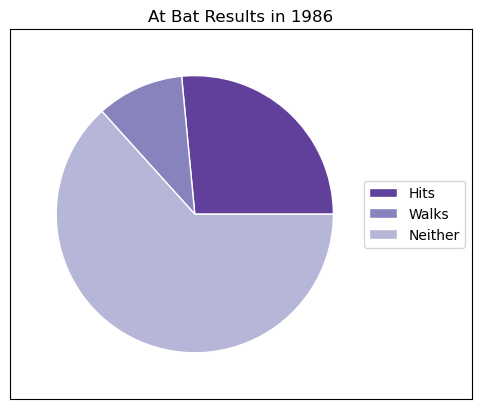

In [47]:
# part d

#the DataFrame odject df was already created in part a

#calculating the percents to be used in the pie chart
total_at_bat = sum(df["AtBat"])
total_hits = sum(df["Hits"])
total_walks = sum(df["Walks"])
total_neither = total_at_bat - (total_hits + total_walks)
percent_hits = total_hits / total_at_bat * 100
percent_walks = total_walks / total_at_bat * 100
percent_neither = total_neither / total_at_bat * 100
percents = [percent_hits, percent_walks, percent_neither]

#playing with colors
colors = plt.get_cmap('Purples')(np.linspace(0.8, 0.4, len(percents)))

#creating a figure and axes
fig, ax = plt.subplots()

#creating the pie chart
ax.pie(percents, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

#making the legend
options = ["Hits", "Walks", "Neither"]
ax.legend(options, loc="right")

# Adjust the axes
ax.set(xlim=(0, 10), ylim=(0, 8))
ax.tick_params(left = False, labelleft = False, 
               bottom = False, labelbottom = False)
ax.set(title="At Bat Results in 1986")

plt.show()

In [56]:
#part e

#count how many rows are empty in the Salary column
num_missing = sum(Hitters["Salary"].isna())

print(f"{num_missing} players are missing salary information.")

#what you can say about these players relative to those who have recorded salaries
print("The palyers with no salary data may have not played during the opening day in 1987, when the salaries were recorded.")

59 players are missing salary information.
The palyers with no salary data may have not played during the opening day in 1987, when the salaries were recorded.


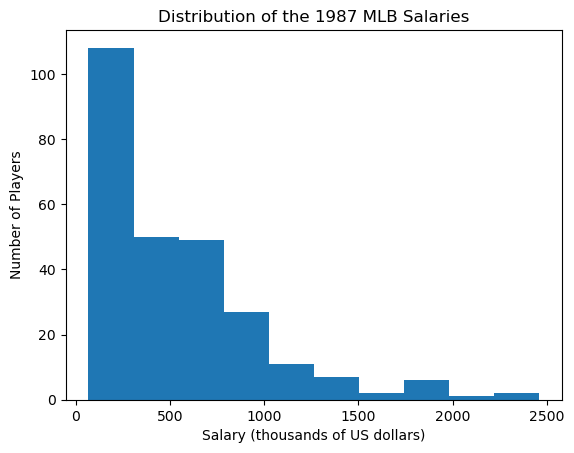

In [88]:
#part f

#the DataFrame odject df was already created in part a

#getting a DataFrame of the salaries that have values
filled_salaries = df[df["Salary"].isna() == False]

#creating the histogram
histogram = plt.hist(filled_salaries["Salary"], bins=10)

#fixing the axes and title
plt.title("Distribution of the 1987 MLB Salaries")
plt.xlabel("Salary (thousands of US dollars)")
plt.ylabel("Number of Players")
plt.show()

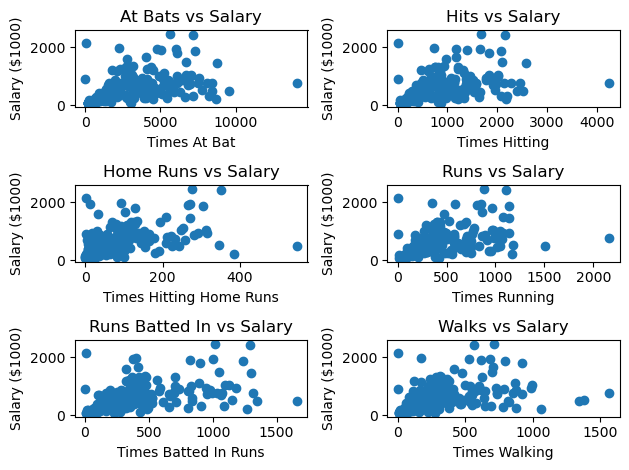

In [82]:
#part g

#creating a 3x2 grid for the scatterplots
fig, axes = plt.subplots(3, 2) 

#scatterplot on the top left
axes[0, 0].scatter(filled_salaries["CAtBat"], filled_salaries["Salary"])
axes[0, 0].set_title('At Bats vs Salary')
axes[0, 0].set(xlabel = "Times At Bat", ylabel = "Salary ($1000)")

#scatterplot on the top right
axes[0, 1].scatter(filled_salaries["CHits"], filled_salaries["Salary"])
axes[0, 1].set_title('Hits vs Salary')
axes[0, 1].set(xlabel = "Times Hitting", ylabel = "Salary ($1000)")

#scatterplot on the middle left
axes[1, 0].scatter(filled_salaries["CHmRun"], filled_salaries["Salary"])
axes[1, 0].set_title('Home Runs vs Salary')
axes[1, 0].set(xlabel = "Times Hitting Home Runs", ylabel = "Salary ($1000)")

#scatterplot on the middle right
axes[1, 1].scatter(filled_salaries["CRuns"], filled_salaries["Salary"])
axes[1, 1].set_title('Runs vs Salary')
axes[1, 1].set(xlabel = "Times Running", ylabel = "Salary ($1000)")

#scatterplot on the bottom left
axes[2, 0].scatter(filled_salaries["CRBI"], filled_salaries["Salary"])
axes[2, 0].set_title('Runs Batted In vs Salary')
axes[2, 0].set(xlabel = "Times Batted In Runs", ylabel = "Salary ($1000)")

#scatterplot on the bottom right
axes[2, 1].scatter(filled_salaries["CWalks"], filled_salaries["Salary"])
axes[2, 1].set_title('Walks vs Salary')
axes[2, 1].set(xlabel = "Times Walking", ylabel = "Salary ($1000)")

#spacing out the plots so the titles are legible
plt.tight_layout()
plt.show()

In [95]:
#part h

#making separate DataFrames for the east and west divisions
division_e = filled_salaries[df["Division"] == "E"]
division_w = filled_salaries[df["Division"] == "W"]

#calculating the sum and mean salary for each division
e_salary_sum = sum(division_e["Salary"])
w_salary_sum = sum(division_w["Salary"])
e_mean = (e_salary_sum) / (len(division_e))
w_mean = (w_salary_sum) / (len(division_w))

print (f"The mean salary of the east division is {e_mean}.\nThe mean salary of the west division is {w_mean}.")
print (f"The east division spent ${(e_salary_sum - w_salary_sum) * 1000} more on salaries than the west division.")


The mean salary of the east division is 624.2713643410852.
The mean salary of the west division is 450.8768731343283.
The east division spent $20113504.999999996 more on salaries than the west division.


/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_1562/1807407662.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  division_e = filled_salaries[df["Division"] == "E"]
/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_1562/1807407662.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  division_w = filled_salaries[df["Division"] == "W"]


/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_1562/1573331511.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vets = filled_salaries[df["Years"] > 12]
/var/folders/d3/n4l8x5353lg330nmdw2f0y140000gn/T/ipykernel_1562/1573331511.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rookies = filled_salaries[df["Years"] < 5]


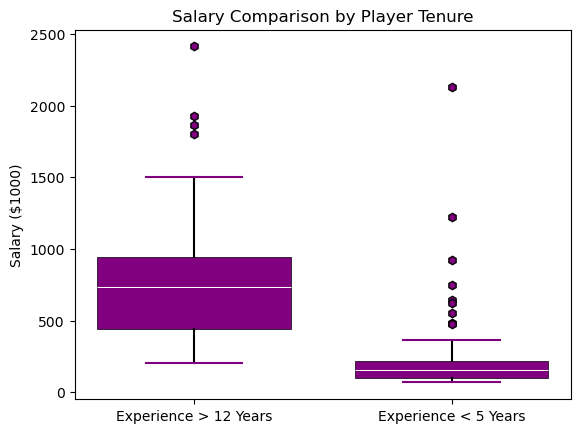

It can be concluded that players with more experience in the MLB are more likely to get paid more than players with little experience in the MLB.


In [110]:
#part i

#making separate DataFrames for tenure over 12 years and under 5 years
vets = filled_salaries[df["Years"] > 12]
rookies = filled_salaries[df["Years"] < 5]

#creating a figure and axes
fig, ax = plt.subplots()

#making the boxplot with the vets and rookies data and playing with colors, lines, and shapes
ax.boxplot([vets["Salary"], rookies["Salary"]],
           positions=[2,4],
           widths=1.5,                 
           patch_artist=True,
           showmeans=False,
           medianprops={"color": "white", "linewidth": 0.75},
           boxprops={"facecolor": "purple", "edgecolor": "black", "linewidth": 0.5},
           whiskerprops={"color": "black", "linewidth": 1.5}, 
           capprops={"color": "purple", "linewidth": 1.5},
           flierprops={"marker": "h", "markerfacecolor": "purple"})

#setting up axes and titles
ax.set(ylabel = "Salary ($1000)") 
ax.set_xticklabels(["Experience > 12 Years", "Experience < 5 Years"])        
ax.set_title("Salary Comparison by Player Tenure")
ax.yaxis.set_major_locator(ticker.MultipleLocator(500))

plt.show()

print("It can be concluded that players with more experience in the MLB are more likely to get paid more than players with little experience in the MLB.")

In [123]:
#part j

#calculating the bating averages and finding the index of the player with the best one
max_ba = 0
player = -1
for i in range(len(df)):
    ba = (Hitters["CHits"][i]) / (Hitters["CAtBat"][i])
    if ba > max_ba:
        max_ba = ba
        player = i

print(f"Player {player} has the highest bating average.")

#printing the league, division, salary, and career batting average of the player
print(f"League: {Hitters["League"][i]}, Division: {Hitters["Division"][i]}, Salary: ${(Hitters["Salary"][i])*1000}, Career Batting Average: {max_ba}")

Player 313 has the highest bating average.
League: A, Division: W, Salary: $1000000.0, Career Batting Average: 0.35205183585313177


In [135]:
#part k

#creating a new column for batting averages in Hitters
Hitters["BA"] = Hitters["CHits"] / Hitters["CAtBat"]

#getting the 5 players with the highest BAs
top5 = Hitters.nlargest(5, "BA")
top5

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,BA
313,580,207,8,107,71,105,5,2778,978,32,...,322,417,A,E,121,267,19,1600.0,A,0.352052
82,677,238,31,117,113,53,5,2223,737,93,...,401,171,A,E,1377,100,6,1975.0,A,0.331534
290,642,211,14,107,59,52,5,2364,770,27,...,230,193,N,W,337,19,4,740.0,N,0.325719
176,181,58,6,34,23,22,1,181,58,6,...,23,22,N,W,88,0,3,86.5,N,0.320442
52,19,7,0,1,2,1,4,41,13,1,...,4,4,A,E,0,0,0,NaN,A,0.317073


## part k (part 2)

Overall the players with the 3 highest batting averages had pretty similar career statistics. The player with the second highest batting average had significantly more career home runs than the others, and the player with the highest batting average had significantly more walks than the rest. The players with the fourth and fifth highest batting averages (especially the fifth) had significantly lower stats overall, which could indicate that they had not been in the league for as long as the top three, with the fifth player having been playing for the least amount of time by a notable difference compared to the players with the top three batting averages.

# Question 3

## part a

When the sample size is extremely large, and the number of predictors is small, it would be better to have a flexible learning method with higher variance and lower bias. This is because a larger sample size will teach the learning method with more accuracy and any noise in the data will be less likely to affect it. 

## part b

When the number of predictors is extremely large, and the number of predictors is small, it would be better to use an inflexible statistical learning method with lower varince and higher bias. This is because a flexible method could get too affected by noise. An inflexible method would be better suited for a large amount of predictors because noise can be more easily created.

## part c

When the relationship between the predictors and response is highly non-linear, it would be better to have a flexible statistical learning method. This is because a highly non-linear relationship in a data set is much harder for an inflexible method to represent because of the complexity of the data. A higher variance than bias would be better at learning and representing complicated relationships in data.

## part d

When the variance of error terms is extremely high, it is better to use an inflexible statistical learning method. This is because this data would have a lot of noise that could negatively affect the accuracy of a flexible method. An inflexible method with higher bias would be better at disregarding the outliers and more accurately simplifying the data.

# Question 4

## part a

This scenario is a regression problem because the output is SAT score which is a numerical value. We are most interested in inference because we are trying to understand the causes of that output. Number of Observations = n = 600, Number of Features = p = 3 (GPA, number of hours spent studying per week, parental education level)

## part b

This scenario is a classification problem because a patient's readmission is the output which has a "yes" or "no" value. We are most interested in inference becasue the goal is to to identify which factors are associated with patient readmission within 30 days of discharge which will help out understanding of why we get a certain output. Number of Observations = n = 2000, Number of Features = p = 5 (age, number of prior visits, length of stay, diagnosis type, and insurance type)

## part c

This scenario is a classification problem because they want to predict whether future campaigns will reach their funding goals which is not numerical output. We are most interested in prediction because the primary goal is to predict the outcome. Number of Observations = n = 45, Number of Features = p = 11 (campaign duration, number of backers, video length, and eight other variables)

## part d

This scenario is a regression problem because the desired output is daily energy consumption which is a numerical value. We are most interested in prediction because the goal is to forecast daily consumption in the future. Number of Observations = n = 365, Number of Features = p = 3 (average temperature, day of the week, and humidity level)